In [ ]:
#Weather data predictions using auto-sklearn
!pip install sklearn

In [ ]:
!pip install auto-sklearn

In [ ]:
!pip install scipy==1.7.0

     |████████████████████████████████| 28.5 MB 1.9 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.
gym 0.17.3 requires cloudpickle<1.7.0,>=1.2.0, but you have cloudpickle 2.0.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
from pprint import pprint

import sklearn.datasets
import sklearn.metrics
from sklearn.model_selection import train_test_split
import autosklearn.regression
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#table of data frame
data = pd.read_csv(r'/content/weather.csv')
data

,Data.Precipitation,Date.Full,Date.Month,Date.Week of,Date.Year,Station.City,Station.Code,Station.Location,Station.State,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed
0,0.00,2016-01-03,1,3,2016,Birmingham,BHM,"Birmingham, AL",Alabama,39,46,32,33,4.33
1,0.00,2016-01-03,1,3,2016,Huntsville,HSV,"Huntsville, AL",Alabama,39,47,31,32,3.86
2,0.16,2016-01-03,1,3,2016,Mobile,MOB,"Mobile, AL",Alabama,46,51,41,35,9.73
3,0.00,2016-01-03,1,3,2016,Montgomery,MGM,"Montgomery, AL",Alabama,45,52,38,32,6.86
4,0.01,2016-01-03,1,3,2016,Anchorage,ANC,"Anchorage, AK",Alaska,34,38,29,19,7.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16738,0.08,2017-01-01,1,1,2017,Casper,CPR,"Casper, WY",Wyoming,23,32,15,23,19.98
16739,0.00,2017-01-01,1,1,2017,Cheyenne,CYS,"Cheyenne, WY",Wyoming,32,42,21,26,15.16
16740,0.00,2017-01-01,1,1,2017,Lander,LND,"Lander, WY",Wyoming,17,29,4,26,1.65
16741,0.06,2017-01-01,1,1,2017,Rawlins,RWL,"Rawlins, WY",Wyoming,23,31,13,24,18.16


In [ ]:
#list of all column names and example of data
data.iloc[0,:]

Data.Precipitation                      0.0
Date.Full                        2016-01-03
Date.Month                                1
Date.Week of                              3
Date.Year                              2016
Station.City                     Birmingham
Station.Code                            BHM
Station.Location             Birmingham, AL
Station.State                       Alabama
Data.Temperature.Avg Temp                39
Data.Temperature.Max Temp                46
Data.Temperature.Min Temp                32
Data.Wind.Direction                      33
Data.Wind.Speed                        4.33
Name: 0, dtype: object

In [ ]:
#Data after dropping unnecessary columns
X = data.drop(["Date.Full","Date.Month","Date.Week of","Date.Year","Station.City","Station.Code","Station.Location","Station.State","Data.Temperature.Avg Temp"], axis = 1)
X

,Data.Precipitation,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed
0,0.00,46,32,33,4.33
1,0.00,47,31,32,3.86
2,0.16,51,41,35,9.73
3,0.00,52,38,32,6.86
4,0.01,38,29,19,7.80
...,...,...,...,...,...
16738,0.08,32,15,23,19.98
16739,0.00,42,21,26,15.16
16740,0.00,29,4,26,1.65
16741,0.06,31,13,24,18.16


In [ ]:
#Target column to be predicted
y = data["Data.Temperature.Avg Temp"]
y

0        39
1        39
2        46
3        45
4        34
         ..
16738    23
16739    32
16740    17
16741    23
16742    21
Name: Data.Temperature.Avg Temp, Length: 16743, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1)


In [ ]:
#making the model ensemble limited to 120 seconds and no more than 30 seconds per individual model
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder='/tmp/testing3',
)
automl.fit(X_train, y_train, dataset_name='temp')

In [ ]:
print(automl.leaderboard()) #shows the top 5 runs and their weights in the ensemble
#pprint(automl.show_models(), indent=4)

          rank  ensemble_weight            type      cost  duration
model_id                                                           
7            1             0.48  ard_regression  0.001581  0.690333
14           2             0.40  ard_regression  0.001581  0.686284
11           3             0.02             mlp  0.001599  5.816049
9            4             0.06     extra_trees  0.001823  9.127603
8            5             0.04        adaboost  0.001934  3.506297


In [ ]:
pprint(automl.show_models(), indent=4)

{   7: {   'cost': 0.001580719939253239,
           'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f89e2dc33d0>,
           'ensemble_weight': 0.48,
           'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7f89e31faa10>,
           'model_id': 7,
           'rank': 1,
           'regressor': <autosklearn.pipeline.components.regression.RegressorChoice object at 0x7f89e3168b50>,
           'sklearn_regressor': ARDRegression(alpha_1=4.7044575285722365e-05, alpha_2=0.000629863807127318,
              copy_X=False, lambda_1=7.584067704707025e-10,
              lambda_2=3.923255608410879e-08,
              threshold_lambda=4052.403778957396, tol=0.009359388994186051)},
    8: {   'cost': 0.0019339499854676978,
           'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f89e323ca90>,
           'ensembl

In [ ]:
train_predictions = automl.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = automl.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))
print(automl.sprint_statistics())

Train R2 score: 0.9986083267506997
Test R2 score: 0.9985862221713608
auto-sklearn results:
  Dataset name: temp
  Metric: r2
  Best validation score: 0.998419
  Number of target algorithm runs: 16
  Number of successful target algorithm runs: 12
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 2
  Number of target algorithms that exceeded the memory limit: 2



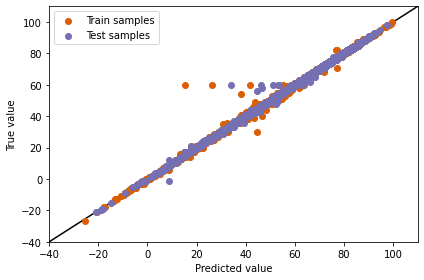

In [ ]:
plt.scatter(train_predictions, y_train, label="Train samples", c='#d95f02')
plt.scatter(test_predictions, y_test, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.plot([-40, 400], [-40, 400], c='k', zorder=0)
plt.xlim([-40, 110])
plt.ylim([-40, 110])
plt.tight_layout()
plt.show()